# Task 1 : Character level Vanilla RNN
Implement Backpropagation through time: In a vanilla RNN with a single hidden layer you must have
three sets of weights: U, V, W. And, you use softmax units for the output layer and tanh units for the
hidden layer.
• Now, train your recurrent neural network using the dataset you created above. You are free to
choose learning parameters (sequence length, learning rate, etc.).
• Report the training loss vs epochs as a plot.
• During training, choose 5 breakpoints (e.g., you train the network for 100 epochs and you choose
the end of epoch 20, 40, 60, 80, 100) and show how well your network learns through time. You
can do it by feeding in the network a chunk of your training text and show what is the output of
the network. Also, report about gradient check routine.
• You are going to explore how the network learns when we change the following parameters:
(a) Number of hidden units: Try doubling and halving your number of hidden units. And after
training, plot the training loss vs the number of training epochs, and show the text sampling
results. Discuss your findings.
(b) Sequence length: Try doubling and halving your length of sequence that feeds into the
network. And after training, plot the training loss vs the number of training epochs, and show
the text sampling results. Discuss your findings.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import nltk
import itertools

In [3]:
import csv
import itertools
import operator
import numpy as np
import sys
from datetime import datetime
import matplotlib.pyplot as plt

import nltk

In [4]:
data = open('concatinated.txt', 'r').read()
chars = str(set(data))

In [5]:
type(data)

str

In [6]:
type(chars)

str

In [7]:
vocabulary_size = 256
unknown_token = "##"
Word_start_token = "WORD_START"
Word_end_token = "WORD_END"

In [8]:
char = nltk.word_tokenize(chars)
char = ["%s %s %s" % (Word_start_token, x, Word_end_token) for x in char]
print( "Parsed %d words." % (len(char)))
char

Parsed 365 words.


['WORD_START { WORD_END',
 "WORD_START '£ WORD_END",
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START Q WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START n WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START X WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START q WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START k WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START F WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START f WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START 5 WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START , WORD_END',
 "WORD_START ' WORD_END",
 'WORD_START Z WORD_END',
 "WORD_STAR

In [9]:
# Assign indices to each word.
char_to_idx = { w: i for i, w in enumerate(char) }
idx_to_char = { i: w for i, w in enumerate(char) }
# print(word_to_idx['good'])

In [10]:
tokenized_char = [nltk.word_tokenize(cha) for cha in char]

In [11]:
tokenized_char

[['WORD_START', '{', 'WORD_END'],
 ['WORD_START', "'£", 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', ',', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', 'Q', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', ',', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', 'n', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', ',', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', 'X', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', ',', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', 'q', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', ',', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', 'k', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', ',', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', 'F', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START', ',', 'WORD_END'],
 ['WORD_START', "'", 'WORD_END'],
 ['WORD_START

In [12]:
char_freq = nltk.FreqDist(itertools.chain(*tokenized_char))
print("Found %d unique char tokens." % len(char_freq.items()))

Found 98 unique char tokens.


In [13]:
char_freq

FreqDist({'WORD_START': 365, 'WORD_END': 365, "'": 174, ',': 95, '``': 3, '{': 1, "'£": 1, 'Q': 1, 'n': 1, 'X': 1, ...})

In [14]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = char_freq.most_common(vocabulary_size-1)
index_to_char = [x[0] for x in vocab]
index_to_char.append(unknown_token)
char_to_index = dict([(w,i) for i,w in enumerate(index_to_char)])

In [15]:
char_to_index

{'WORD_START': 0,
 'WORD_END': 1,
 "'": 2,
 ',': 3,
 '``': 4,
 '{': 5,
 "'£": 6,
 'Q': 7,
 'n': 8,
 'X': 9,
 'q': 10,
 'k': 11,
 'F': 12,
 'f': 13,
 '5': 14,
 'Z': 15,
 '#': 16,
 '4': 17,
 '8': 18,
 "'s": 19,
 '0': 20,
 '2': 21,
 'R': 22,
 "'*": 23,
 '`': 24,
 "'M": 25,
 '”': 26,
 '%': 27,
 'i': 28,
 'U': 29,
 "'S": 30,
 '‘': 31,
 'b': 32,
 'A': 33,
 'N': 34,
 'L': 35,
 '9': 36,
 'u': 37,
 ']': 38,
 '7': 39,
 '1': 40,
 'o': 41,
 '>': 42,
 '$': 43,
 'a': 44,
 'w': 45,
 'H': 46,
 "'+": 47,
 'e': 48,
 'v': 49,
 "'m": 50,
 "'T": 51,
 '<': 52,
 "'/": 53,
 "'D": 54,
 'h': 55,
 'O': 56,
 'J': 57,
 "'d": 58,
 'p': 59,
 '[': 60,
 'y': 61,
 '’': 62,
 'K': 63,
 '_': 64,
 '@': 65,
 '?': 66,
 'r': 67,
 'Y': 68,
 'G': 69,
 'c': 70,
 "'t": 71,
 '.': 72,
 '&': 73,
 '(': 74,
 '!': 75,
 'V': 76,
 'z': 77,
 'j': 78,
 ';': 79,
 "'-": 80,
 'I': 81,
 "'\\n": 82,
 'B': 83,
 '6': 84,
 'x': 85,
 'l': 86,
 'E': 87,
 '“': 88,
 ')': 89,
 'g': 90,
 'P': 91,
 "'=": 92,
 'C': 93,
 ':': 94,
 'W': 95,
 '3': 96,
 '}': 

In [16]:
print("Using vocabulary size %d." % vocabulary_size)
print("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))
char_freq.most_common(10)

Using vocabulary size 256.
The least frequent word in our vocabulary is '}' and appeared 1 times.


[('WORD_START', 365),
 ('WORD_END', 365),
 ("'", 174),
 (',', 95),
 ('``', 3),
 ('{', 1),
 ("'£", 1),
 ('Q', 1),
 ('n', 1),
 ('X', 1)]

In [17]:
for i, char in enumerate(tokenized_char):
    tokenized_char[i] = [c if c in char_to_index else unknown_token for c in char]

In [18]:
print("\nExample sentence: '%s'" % char[0])
print("\nExample sentence after Pre-processing: '%s'" % tokenized_char[0])


Example sentence: 'WORD_START'

Example sentence after Pre-processing: '['WORD_START', '{', 'WORD_END']'


In [19]:
# Create the training data
XTrain = np.asarray([[char_to_index[w] for w in char[:-1]] for word in tokenized_char])
yTrain = np.asarray([[char_to_index[w] for w in char[1:]] for word in tokenized_char])

In [20]:
XTrain

array([[ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97],
       [ 0, 97

In [21]:
yTrain

array([[97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1],
       [97,  1

In [22]:
class RNNVanilla:
     
    def __init__(self, char_dim, hidden_dim=100, bptt_truncate=4):
        
        # Assign instance variables
        self.char_dim = char_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./char_dim), np.sqrt(1./char_dim), (hidden_dim, char_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (char_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))

In [23]:
class RNNVanilla:
     
    def __init__(self, char_dim, hidden_dim=200, bptt_truncate=4):
        
        # Assign instance variables
        self.char_dim = char_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./char_dim), np.sqrt(1./char_dim), (hidden_dim, char_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (char_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))

In [24]:
class RNNVanilla:
     
    def __init__(self, char_dim, hidden_dim=50, bptt_truncate=4):
        
        # Assign instance variables
        self.char_dim = char_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./char_dim), np.sqrt(1./char_dim), (hidden_dim, char_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (char_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))

In [25]:
def softmax(x):
    xt = np.exp(x - np.max(x))
    return xt / np.sum(xt)

In [26]:
def forward_propagation(self, x):
    # The total number of time steps
    T = len(x)
        
    # During forward propagation we save all hidden states in s because need them later.
        
    # We add one additional element for the initial hidden, which we set to 0
    s = np.zeros((T + 1, self.hidden_dim)) 
    s[-1] = np.zeros(self.hidden_dim)
        
    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.char_dim))
        
    # For each time step...
    for t in np.arange(T):
        # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
        s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
        o[t] = softmax(self.V.dot(s[t]))
    return [o, s]  #We not only return the calculated outputs, but also the hidden states. 
                   #We will use them later to calculate the gradients

#Now make it a member of the class RNNVanilla
RNNVanilla.forward_propagation = forward_propagation

In [27]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)

#Now make it a member of the class RNNVanilla
RNNVanilla.predict = predict

In [28]:
def calculate_total_loss(self, x, y):
    L = 0
    
    # For each sentence...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        
        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        
        # Add to the loss based on how off we were
        L += -1 * sum(np.log(correct_word_predictions))
    return L
 
def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x,y)/N
 
RNNVanilla.calculate_total_loss = calculate_total_loss
RNNVanilla.calculate_loss = calculate_loss

In [29]:
vocabulary_size

256

In [30]:
print("length of XTrain[10] is %d" % (len(XTrain[10])))
np.random.seed(10)

model = RNNVanilla(vocabulary_size)
o, s = model.forward_propagation(XTrain[10])
print(o.shape)
print(o)

length of XTrain[10] is 2
(2, 256)
[[0.00389602 0.0038746  0.00402885 0.00384822 0.00396898 0.0038531
  0.0039995  0.00390554 0.00393103 0.00404275 0.00393743 0.00391026
  0.00391837 0.00386622 0.00392067 0.00381801 0.00394438 0.00393367
  0.00396096 0.00383632 0.00396076 0.00386393 0.0040291  0.00392223
  0.00392246 0.0038789  0.00389059 0.00395723 0.00379702 0.00401445
  0.00397753 0.00397967 0.00405911 0.00387399 0.00398612 0.00394977
  0.00407061 0.0038003  0.00396349 0.00389879 0.00384264 0.00390228
  0.00398253 0.00399717 0.00374019 0.00387766 0.00373401 0.0040001
  0.00391511 0.00385666 0.00400444 0.00399524 0.00385438 0.00388917
  0.00399442 0.00398036 0.00376616 0.00382669 0.00383362 0.00373814
  0.00394326 0.00388078 0.00392536 0.00394737 0.00385902 0.00393379
  0.00395092 0.00380403 0.00401859 0.00391603 0.00393925 0.0037379
  0.00395466 0.00388117 0.00389038 0.00387361 0.00382008 0.00390844
  0.00392796 0.00394639 0.00403966 0.00403481 0.00386638 0.00394726
  0.00379528 0.0

In [31]:
predictions = model.predict(XTrain[10])
print(predictions.shape)
print(predictions)
print("index_to_char>")
#print('%s'%" ".join([index_to_char[x-1] for x in predictions]))

(2,)
[154   4]
index_to_char>


In [32]:
np.log(vocabulary_size)

5.545177444479562

In [33]:
def bptt(self, x, y):
    T = len(y)
    # Perform forward propagation
    o, s = self.forward_propagation(x)
    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)
        
        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        
        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            
            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])              
            dLdU[:,x[bptt_step]] += delta_t
            
            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
    return [dLdU, dLdV, dLdW]
 
RNNVanilla.bptt = bptt

In [34]:
def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
    # Calculate the gradients using backpropagation. We want to checker if these are correct.
    bptt_gradients = self.bptt(x, y)
    
    # List of all parameters we want to check.
    model_parameters = ['U', 'V', 'W']
    
    # Gradient check for each parameter
    for pidx, pname in enumerate(model_parameters):
        # Get the actual parameter value from the mode, e.g. model.W
        parameter = operator.attrgetter(pname)(self)
        print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
        # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
        it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index
            # Save the original value so we can reset it later
            original_value = parameter[ix]
            # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
            parameter[ix] = original_value + h
            gradplus = self.calculate_total_loss([x],[y])
            parameter[ix] = original_value - h
            gradminus = self.calculate_total_loss([x],[y])
            estimated_gradient = (gradplus - gradminus)/(2*h)
            # Reset parameter to original value
            parameter[ix] = original_value
            # The gradient for this parameter calculated using backpropagation
            backprop_gradient = bptt_gradients[pidx][ix]
            # calculate The relative error: (|x - y|/(|x| + |y|))
            relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
            # If the error is to large fail the gradient check
            if relative_error > error_threshold:
                print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                print ("+h Loss: %f" % gradplus)
                print ("-h Loss: %f" % gradminus)
                print ("Estimated_gradient: %f" % estimated_gradient)
                print ("Backpropagation gradient: %f" % backprop_gradient)
                print ("Relative Error: %f" % relative_error)
                return
            it.iternext()
        print ("Gradient check for parameter %s passed." % (pname))
 
RNNVanilla.gradient_check = gradient_check

In [35]:
# To avoid performing millions of expensive calculations we use a smaller vocabulary size for checking.
grad_check_vocab_size = 100
np.random.seed(10)
model = RNNVanilla(grad_check_vocab_size, 10, bptt_truncate=1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


In [36]:
# Performs one step of SGD.
def numpy_sdg_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)
    # Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
    
RNNVanilla.sgd_step = numpy_sdg_step

In [37]:
# Outer SGD Loop
# - model: The RNN model instance
# - X_train: The training data set
# - y_train: The training data labels
# - learning_rate: Initial learning rate for SGD
# - nepoch: Number of times to iterate through the complete dataset
# - evaluate_loss_after: Evaluate the loss after this many epochs
def train_with_sgd(model, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=5):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5 
                print ("Setting learning rate to %f" % learning_rate)
            sys.stdout.flush()
        # For each training example...
        for i in range(len(y_train)):
            # One SGD step
            model.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1
    return losses
            

In [38]:
np.random.seed(10)
model = RNNVanilla(vocabulary_size)
%timeit model.sgd_step(XTrain[10], yTrain[10], learning_rate=0.005)

411 µs ± 57.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNVanilla(vocabulary_size)
losses = train_with_sgd(model, XTrain[:100], yTrain[:100], nepoch=100, evaluate_loss_after=20)

2019-11-03 23:05:32: Loss after num_examples_seen=0 epoch=0: 5.565788
2019-11-03 23:05:34: Loss after num_examples_seen=2000 epoch=20: 0.005008
2019-11-03 23:05:35: Loss after num_examples_seen=4000 epoch=40: 0.002091
2019-11-03 23:05:36: Loss after num_examples_seen=6000 epoch=60: 0.001302
2019-11-03 23:05:37: Loss after num_examples_seen=8000 epoch=80: 0.000939


In [60]:
losses

[(0, 5.565787767033511),
 (2000, 0.005008395442145639),
 (4000, 0.0020908697219542676),
 (6000, 0.001301550182594437),
 (8000, 0.0009386397793152527)]

In [61]:
output = [lis[1] for lis in losses]
output

[5.565787767033511,
 0.005008395442145639,
 0.0020908697219542676,
 0.001301550182594437,
 0.0009386397793152527]

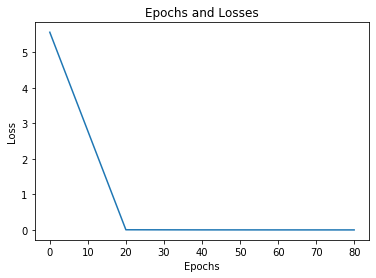

In [62]:
epoch=[0,20,40,60,80]
#plt.figure(0)
plt.title("Epochs and Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epoch,output)
plt.show()

In [78]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model1 = RNNVanilla(vocabulary_size)
losses1 = train_with_sgd(model1, XTrain[:100], yTrain[:100], nepoch=100, evaluate_loss_after=20)

2019-11-03 23:07:53: Loss after num_examples_seen=0 epoch=0: 5.571296
2019-11-03 23:07:57: Loss after num_examples_seen=2000 epoch=20: 0.004025
2019-11-03 23:08:01: Loss after num_examples_seen=4000 epoch=40: 0.001690
2019-11-03 23:08:04: Loss after num_examples_seen=6000 epoch=60: 0.001052
2019-11-03 23:08:08: Loss after num_examples_seen=8000 epoch=80: 0.000758


In [79]:
output1 = [lis[1] for lis in losses1]
output1

[5.571296492254646,
 0.004025137137797063,
 0.0016903732956962683,
 0.0010519788602338556,
 0.0007579169868605213]

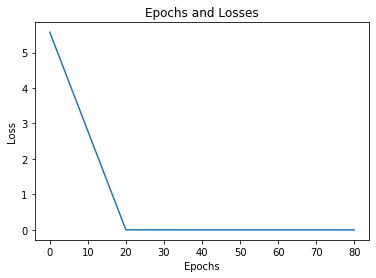

In [80]:
epoch=[0,20,40,60,80]
#plt.figure(0)
plt.title("Epochs and Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epoch,output1)
plt.show()

In [99]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model2 = RNNVanilla(vocabulary_size)
losses2 = train_with_sgd(model2, XTrain[:100], yTrain[:100], nepoch=100, evaluate_loss_after=20)

2019-11-03 23:10:28: Loss after num_examples_seen=0 epoch=0: 5.554239
2019-11-03 23:10:29: Loss after num_examples_seen=2000 epoch=20: 0.006257
2019-11-03 23:10:30: Loss after num_examples_seen=4000 epoch=40: 0.002645
2019-11-03 23:10:31: Loss after num_examples_seen=6000 epoch=60: 0.001656
2019-11-03 23:10:31: Loss after num_examples_seen=8000 epoch=80: 0.001198


In [100]:
output2 = [lis[1] for lis in losses2]
output2

[5.554239466157852,
 0.006256990194798263,
 0.002645498558496545,
 0.0016558000486224496,
 0.001198352047612288]

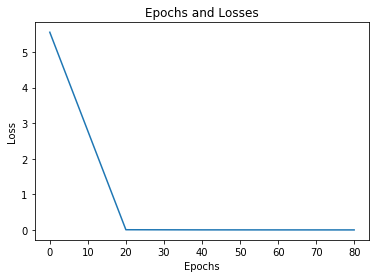

In [101]:
epoch=[0,20,40,60,80]
#plt.figure(0)
plt.title("Epochs and Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epoch,output2)
plt.show()

In [ ]:
#Findings :
#The loss should decrease with increase in number of epochs whether we double or half the Hidden layers
#or the sequence length